# Homework 1
by: Youssef Shaaban

## Importing needed data and libraries 

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("./data/yellow_tripdata_2022-01.parquet")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


### Q1 : How many Columns are there?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

There is 19 Column in this dataset 

### Q2: What's the average trip duration in January?

In [7]:
durations = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
durations = durations.apply(lambda x: x.total_seconds()/60)

df["duration"] = durations
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [8]:
df.duration.std()

46.44530513776499

the answer is 46.44 mins

### Q3: What fraction of the records left after you dropped the outliers?

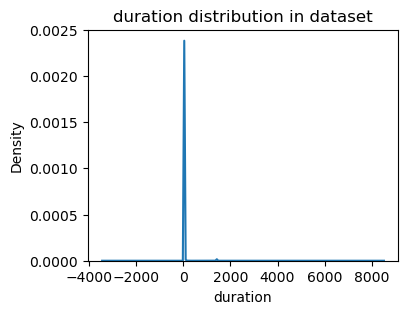

In [9]:
plt.figure(figsize = (4,3))
sns.kdeplot(df.duration)
plt.title("duration distribution in dataset");

In [12]:
df[(df.duration >= 1) & (df.duration <= 60)].shape[0] / df.shape[0]

0.9827547930522406

In [13]:
df = df[(df.duration >= 1) & (df.duration <= 60)].reset_index()
df.drop(axis = 1, columns = ["index"], inplace = True)

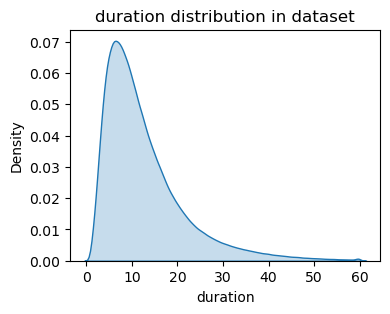

In [14]:
plt.figure(figsize = (4,3))
sns.kdeplot(df.duration, fill=True)
plt.title("duration distribution in dataset");

the fraction equal 98.2%

###  Q4: What's the dimensionality of this matrix?

In [15]:
df_train = df.iloc[:, 7:9] 

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train = encoder.fit_transform(df_train)

In [17]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

the dimensions of the output matix is 2421440x515

### Q5: What's the RMSE on train?

In [18]:
from sklearn.linear_model import LinearRegression

y_train = df.duration

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

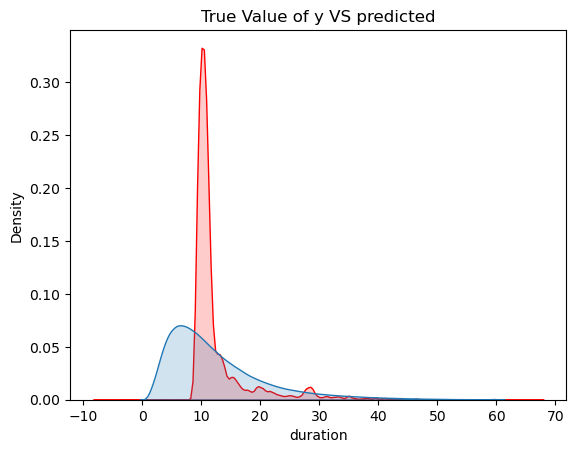

In [19]:
sns.kdeplot(y_pred, fill= True, alpha = 0.2, color = "red", label = "prediction")
sns.kdeplot(y_train, fill= True, alpha = 0.2, label = "True")
plt.title("True Value of y VS predicted");

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred = y_pred, y_true = y_train, squared= False)

6.986190838127513

The RMSE score equal 6.99

In [21]:
def readData(filePath:str):
    df = pd.read_parquet(filePath)
    durations = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    durations = durations.apply(lambda x: x.total_seconds()/60)

    df["duration"] = durations
    df = df[(df.duration >= 1) & (df.duration <= 60)].reset_index()
    df.drop(axis = 1, columns = ["index"], inplace = True)
    return df

In [22]:
df_val = readData("./data/yellow_tripdata_2022-02.parquet")

In [27]:
## an error happend because there is no Id 110 in training data, so encoder raise an error
## I needed to remove this 2 rows to make it run 
df_val = df_val.drop(df_val[ np.isin(df_val.PULocationID, [99,172,176,251])].index)

In [28]:
X_val = encoder.transform(df_val.iloc[:, 7:9])
y_val = df_val.duration

y_pred = clf.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.786341475245242

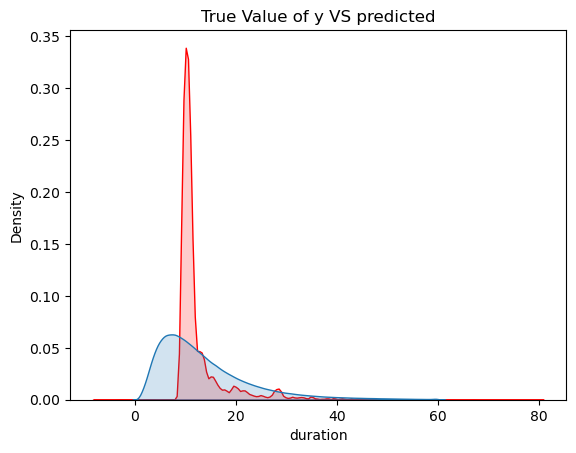

In [29]:
sns.kdeplot(y_pred, fill= True, alpha = 0.2, color = "red", label = "prediction")
sns.kdeplot(y_val, fill= True, alpha = 0.2, label = "True")
plt.title("True Value of y VS predicted");

The validation RMSE = 7.79